# 데이터 불러오기

In [1]:
! pip3 install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
application_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Application.csv"
job_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Job.csv"

In [4]:
application_df = pd.read_csv(application_path)
application_df.head(2)

,Unnamed: 0,cdate,company_uuid,job_uuid,user_uuid,application_uuid
0,0,2017-02-25 23:45:01,de4b3596-b4ab-47cd-b8ea-6f9e14170064,459e461d-a571-4ed3-8751-8f4cb5b9ff37,b0329bd7-fc45-4e83-993a-b73bd9d3549c,59c42363-f764-4cbd-aafd-20eb663ea5d7
1,1,2020-11-23 14:46:07.329731,f6156b12-d4d7-469f-84be-31799c765211,e5ed4f4a-08aa-4f2d-9042-1e9bbd36803f,b0329bd7-fc45-4e83-993a-b73bd9d3549c,425db0e8-87f8-4b4d-8248-7f24c31d49d3


In [5]:
job_df = pd.read_csv(job_path)
job_df.head(2)

,Unnamed: 0,cdate,mdate,job_field,career_type_string,start_date,end_date,allow_remote,can_show_salary,job_uuid,company_uuid
0,0,2020-11-25 10:32:10,2020-11-25 10:32:10,SW 개발,"신입,경력,인턴",NaN,2020-11-25,1,0,764292b0-53f8-4f14-ac83-6eafc7a6a18d,daa34559-fc42-47f6-b5c6-cc6171404f37
1,1,2020-12-03 16:24:16,2020-12-03 16:24:16,HW 개발,인턴,2020-12-03,2020-12-04,1,0,b2b598d6-9ca3-4eb4-ac9c-bb57a6dad2ad,daa34559-fc42-47f6-b5c6-cc6171404f37


# 직무/경력 조건별 분석

## 1. 직무별 지원율 분석

In [6]:
# 공고 + 지원 매칭
job_app = pd.merge(application_df[["job_uuid"]], job_df[["job_uuid", "job_field"]], on="job_uuid", how="left")

# 직무별 지원 수
job_field_support = job_app["job_field"].value_counts().reset_index()
job_field_support.columns = ["job_field", "application_count"]

# 직무별 공고 수
job_field_postings = job_df["job_field"].value_counts().reset_index()
job_field_postings.columns = ["job_field", "posting_count"]

# 병합 후 지원율 계산
job_popularity = pd.merge(job_field_support, job_field_postings, on="job_field", how="outer").fillna(0)
job_popularity["지원율(공고당)"] = job_popularity["application_count"] / job_popularity["posting_count"]
job_popularity.sort_values(by="지원율(공고당)", ascending=False, inplace=True)

print(job_popularity.head(10))

  job_field  application_count  posting_count  지원율(공고당)
1     SW 개발             190519          58923  3.233355
9        투자                866            420  2.061905
5       디자인              36778          19872  1.850745
3      경영지원              12101           6541  1.850023
7      비즈니스              18711          10459  1.788986
4     기획/PM              19548          11719  1.668060
6       마케팅              32614          19963  1.633722
8        운영              18508          14611  1.266717
2     게임 개발                620            644  0.962733
0     HW 개발                923           1095  0.842922


## 2. 경력 조건별 지원율 분석

In [8]:
job_app.head(1)

,job_uuid,job_field
0,459e461d-a571-4ed3-8751-8f4cb5b9ff37,운영


In [9]:
# 공고 + 지원 매칭
job_app = pd.merge(application_df[['job_uuid']], job_df[['job_uuid', 'career_type_string']], on='job_uuid', how='left')

# 경력 조건별 지원 수
career_support = job_app["career_type_string"].value_counts().reset_index()
career_support.columns = ["career_type_string", "application_count"]

# 경력 조건별 공고 수
career_postings = job_df["career_type_string"].value_counts().reset_index()
career_postings.columns = ["career_type_string", "posting_count"]

# 병합 후 지원율 계산
career_popularity = pd.merge(career_support, career_postings, on="career_type_string", how="outer").fillna(0)
career_popularity["지원율(공고당)"] = career_popularity["application_count"] / career_popularity["posting_count"]
career_popularity.sort_values(by="지원율(공고당)", ascending=False, inplace=True)

print(career_popularity.head(10))

  career_type_string  application_count  posting_count  지원율(공고당)
3              신입,경력             119464          36529  3.270388
2                 신입               9327           3274  2.848809
5              신입,인턴               8436           3373  2.501038
4           신입,경력,인턴              49835          20928  2.381260
6                 인턴               8673           4360  1.989220
0                 경력             133964          74682  1.793792
1              경력,인턴               1489           1101  1.352407


## 3. 시각화

In [10]:
# 지원 내역에 직무, 경력 조건 붙이기
app_with_job = pd.merge(application_df, job_df[["job_uuid", "job_field", "career_type_string"]], on="job_uuid", how="left")

# 직무별 지원 수
job_field_counts = app_with_job["job_field"].value_counts().reset_index()
job_field_counts.columns = ["job_field", "application_count"]

# 경력 조건별 지원 수
career_counts = app_with_job["career_type_string"].value_counts().reset_index()
career_counts.columns = ["career_type", "application_count"]

<ipython-input-11-3420f9f9ea05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_field_counts, x="application_count", y="job_field", palette="Blues_d")


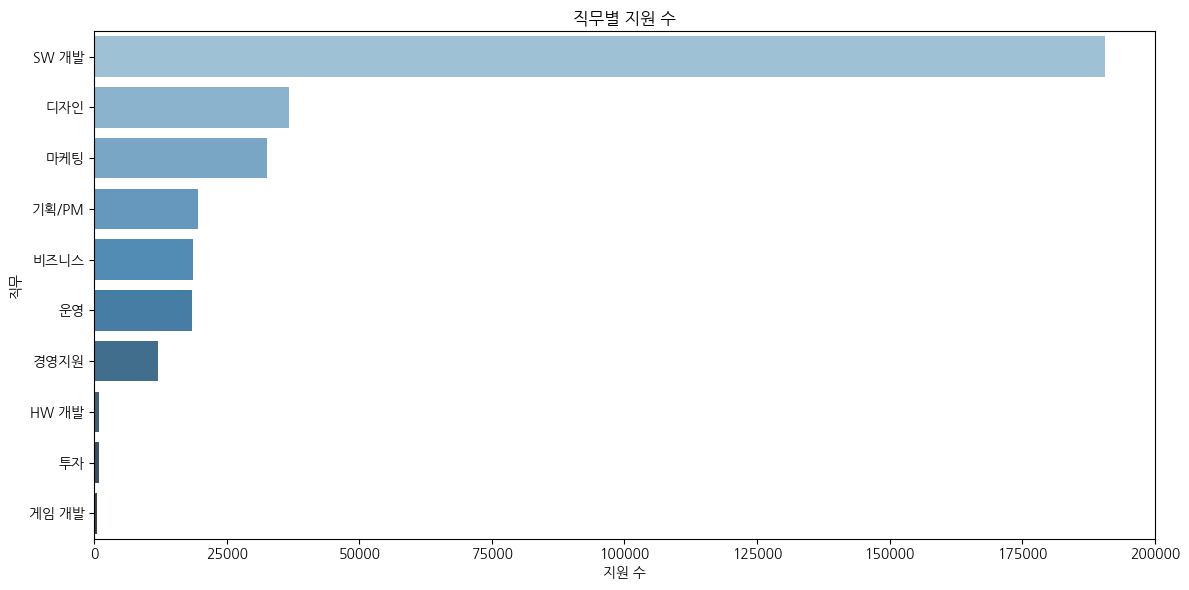

In [11]:
# 시각화: 직무별
plt.figure(figsize=(12,6))
sns.barplot(data=job_field_counts, x="application_count", y="job_field", palette="Blues_d")
plt.title("직무별 지원 수")
plt.xlabel("지원 수")
plt.ylabel("직무")
plt.tight_layout()
plt.show()

<ipython-input-12-24c2f646b6ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=career_counts, x="application_count", y="career_type", palette="Greens_d")


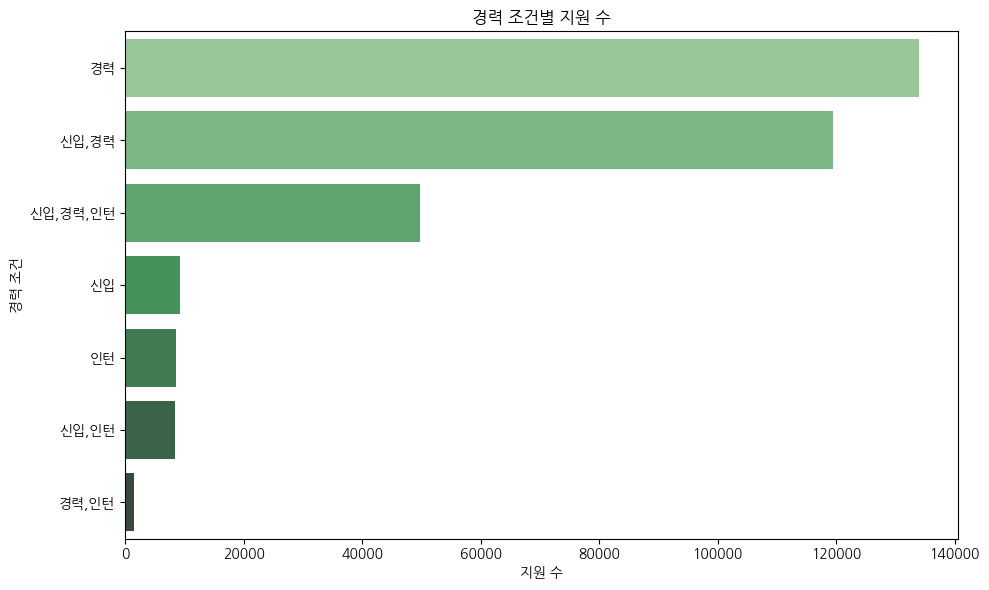

In [12]:
# 시각화: 경력 조건별
plt.figure(figsize=(10,6))
sns.barplot(data=career_counts, x="application_count", y="career_type", palette="Greens_d")
plt.title("경력 조건별 지원 수")
plt.xlabel("지원 수")
plt.ylabel("경력 조건")
plt.tight_layout()
plt.show()

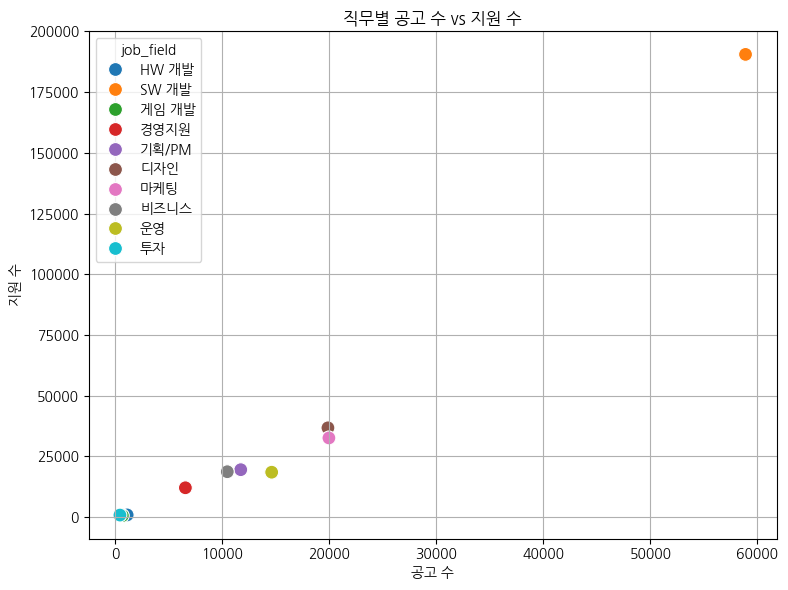

In [13]:
# 공고 수
job_post_counts = job_df["job_field"].value_counts().reset_index()
job_post_counts.columns = ["job_field", "job_post_count"]

# 지원 수
job_app_counts = app_with_job["job_field"].value_counts().reset_index()
job_app_counts.columns = ["job_field", "application_count"]

# 병합
job_stats = pd.merge(job_post_counts, job_app_counts, on="job_field", how="outer").fillna(0)

# 산점도
plt.figure(figsize=(8,6))
sns.scatterplot(data=job_stats, x="job_post_count", y="application_count", hue="job_field", s=100)
plt.title("직무별 공고 수 vs 지원 수")
plt.xlabel("공고 수")
plt.ylabel("지원 수")
plt.grid(True)
plt.tight_layout()
plt.show()